## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group 5
* Team member names:
    - Mohib Mohyuddin
    - Gaetan Rieben
    - Mohannad AlSaegh
    - Albara Altoukhi

## Setup

Please complete this Jupyter notebook by answering the questions in `s-mobile.pdf` on Canvas. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. Please also push your final notebook to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML from the Jupyter Notebook file without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is a group assignment for MGTA 455 and you will be using git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". git will not decide for you who's change to accept so the team-lead will have to determine which edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

## Setup

Please complete this python notebook with your group by answering the questions in `s-mobile-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [98]:
import pandas as pd
import pyrsm as rsm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
rsm.__version__ # should be 0.9.20 or newer

'0.9.20'

In [99]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [100]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [101]:
#s_mobile_1M = pd.read_parquet("https://www.dropbox.com/scl/fi/upm68ytk5r7oz2xd61qau/s_mobile_1M.parquet?rlkey=0pap46l024yryr4h08mvexiha&dl=1")
#s_mobile_1M

In [102]:
# run python code from another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")
%run ./sub-notebooks/model1.ipynb


```python
lr = rsm.model.logistic(
    data=s_mobile.query("training == 1"),
    rvar="churn",
    lev="yes",
    evar="changer",
)
print(lr.summary())
```


Logistic regression (GLM)
Data                 : Not provided
Response variable    : churn
Level                : yes
Explanatory variables: changer
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

              OR    OR%  coefficient  std.error  z.value p.value    
Intercept  0.990  -1.0%        -0.01      0.013   -0.786   0.432    
changer    1.001   0.1%         0.00      0.000    2.737   0.006  **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): 0.0
Area under the RO Curve (AUC): 0.509
Log-likelihood: -18919.161, AIC: 37842.322, BIC: 37858.752
Chi-squared: 7.514, df(1), p.value 0.006 
Nr obs: 27,300
None


In [103]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## What drives churn in the telecom industry:
https://www.bain.com/insights/breaking-the-back-of-customer-churn/

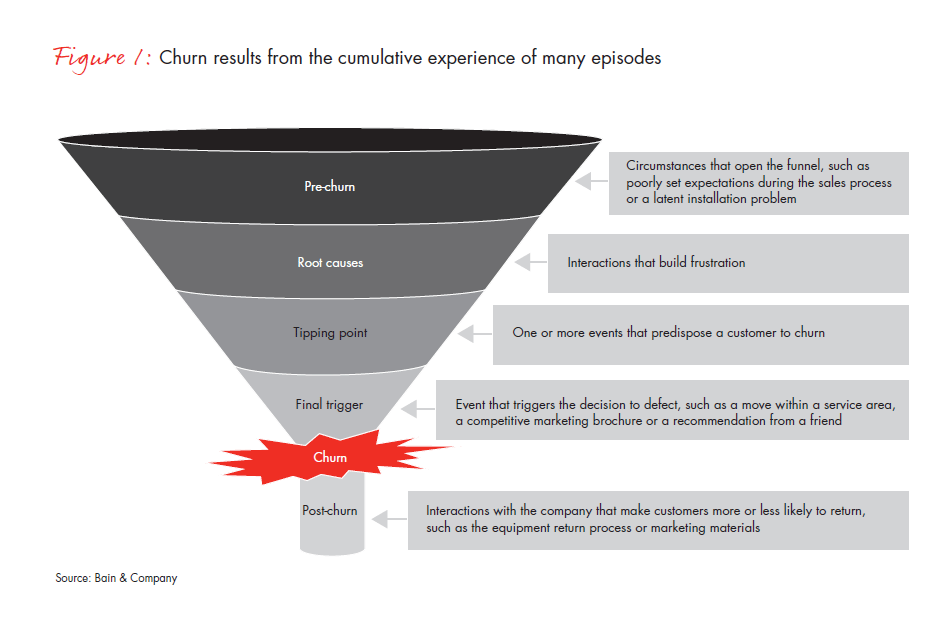

## Question 1) Develop a model to predict customer churn

### Exploring the dataset

In [104]:
s_mobile.head()

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1
3,U75794640,no,0,-8,35,560,0,0,0,37,...,no,yes,yes,yes,no,no,NW,retired,1.0,0
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,no,yes,yes,no,SW,other,NaN,1


No plot will be created for customer (type object)


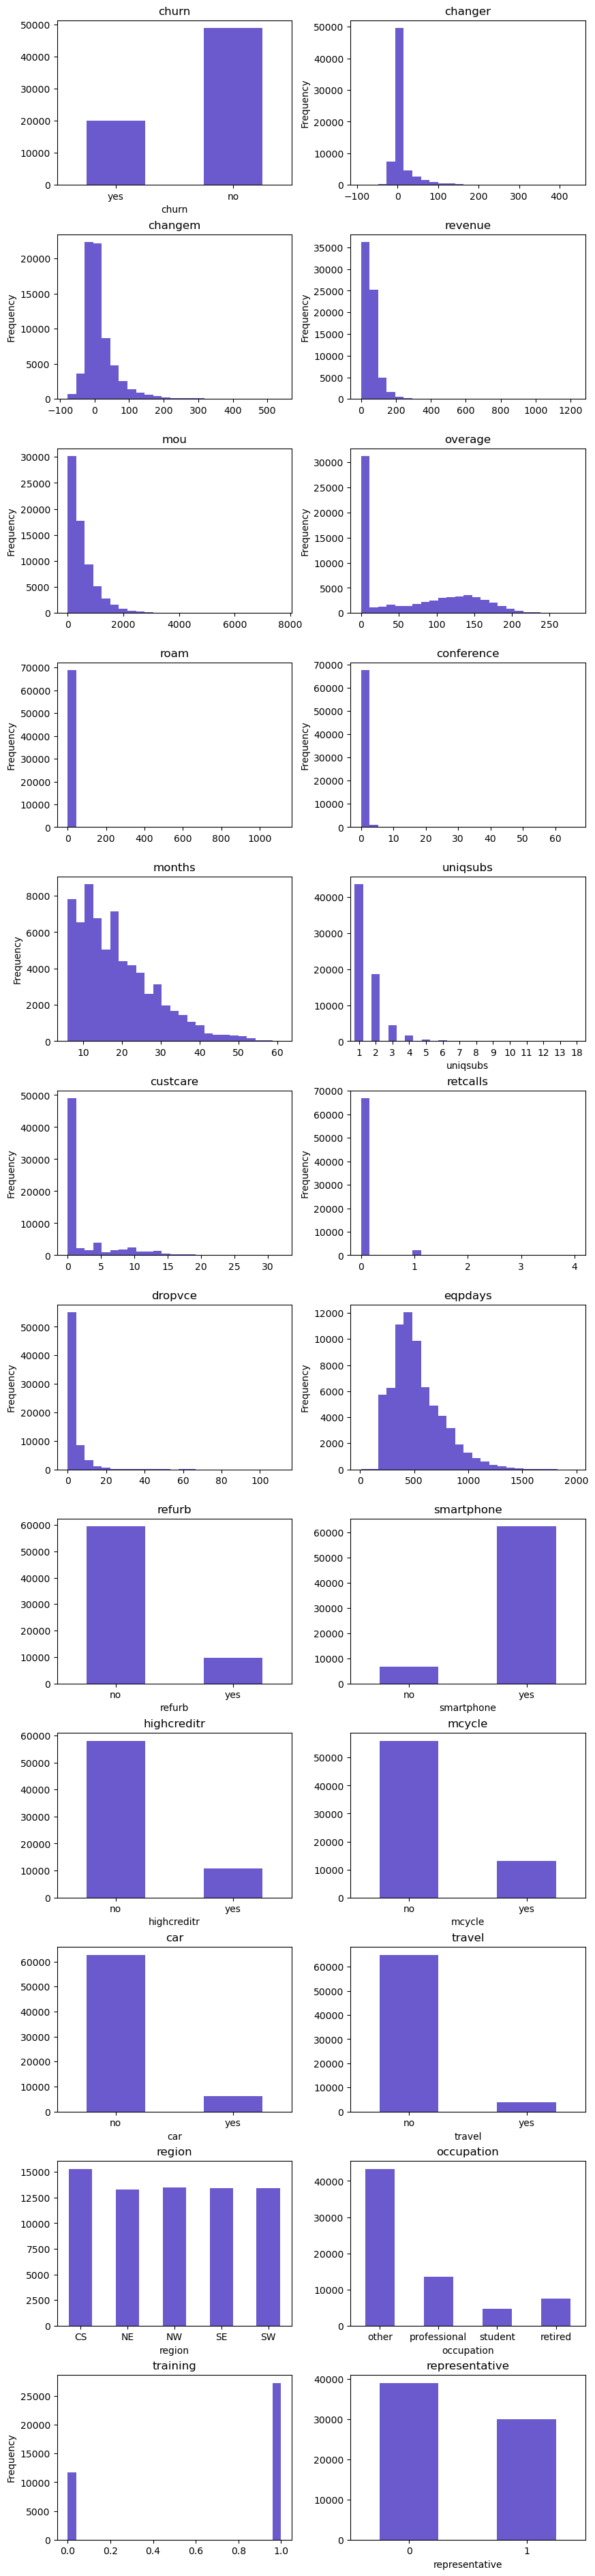

In [105]:
rsm.distr_plot(s_mobile)

In [106]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, 'churn':], #from churn to the last one
    drop_first=True,
).agg(['mean','std','min','max']).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.25895,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


Some initial thoughts:
-   Negative change in revenue could be contributing to churn
-   Negative change in changem could be another contributing factor to churn

Exploring the representative sample as well just to see what the actual churn rates are

In [107]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
    drop_first=True,
).agg(['mean','std','min','max']).T

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,56.6348,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [108]:
churn_rates = pd.crosstab(
    index=s_mobile['representative'],
    columns=s_mobile['churn'],
)
churn_rates

churn,yes,no
representative,,
0,19500,19500
1,600,29400


In [109]:
rep_churn_no = churn_rates.iloc[1,1]
rep_churn_yes = churn_rates.iloc[1,0]

no_to_yes_ratio = rep_churn_no/rep_churn_yes
display(rep_churn_no,rep_churn_yes,no_to_yes_ratio)

29400

600

49.0

The weight is essentially the ratio of churn to retention in the representative sample and we want to tell the model that despite there being a low number of no churn in the downsample (training data) in the actual dataset we will have 49 times more no-churn compared to churn. 

We will take the ratio of churn to no churn in the representative sample which is 1:49 and use 49 as the weight for no churn in the training sample for our model

In [110]:
s_mobile['churn'].value_counts()

churn
no     48900
yes    20100
Name: count, dtype: int64

### Building a predictive model to predict churn - Logit will serve as the benchmark that ML models will hopefully beat

#### Logistic Regression

In [111]:
class_weight_dict = {0:49,1:1}
s_mobile['cweight'] = np.where(
    s_mobile.churn == 'yes',class_weight_dict[1],class_weight_dict[0]
)

Setting up the feature matrix

In [112]:
# feature matrix
rvar = "churn"
feature_matrix = s_mobile.columns.to_list()
feature_matrix = feature_matrix[feature_matrix.index(rvar)+1 : feature_matrix.index("training")]
feature_matrix

['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

In [113]:
s_mobile['training'].value_counts()

training
1.0    27300
0.0    11700
Name: count, dtype: int64

Estimating a Logit without weights

In [114]:
lr = rsm.model.logistic(
    data={"s_mobile": s_mobile[s_mobile.training == 1]},
    rvar="churn",
    lev="yes",
    evar=feature_matrix,
)
lr.summary()

Logistic regression (GLM)
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

                             OR     OR%  coefficient  std.error  z.value p.value     
Intercept                 0.858  -14.2%        -0.15      0.081   -1.903   0.057    .
refurb[yes]               1.351   35.1%         0.30      0.038    7.952  < .001  ***
smartphone[yes]           0.910   -9.0%        -0.09      0.047   -2.004   0.045    *
highcreditr[yes]          0.492  -50.8%        -0.71      0.040  -17.759  < .001  ***
mcycle[yes]               0.900  -10.0%        -0.11      0.043   -2.473   0.013    *
car[yes]                  1.001    0.1%         0.00      0.057    0.0

In [115]:
lr.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.351,35.125,0.301,0.038,7.952,0.000,***
2,smartphone[T.yes],0.910,-8.962,-0.094,0.047,-2.004,0.045,*
3,highcreditr[T.yes],0.492,-50.760,-0.708,0.040,-17.759,0.000,***
4,mcycle[T.yes],0.900,-9.982,-0.105,0.043,-2.473,0.013,*
5,car[T.yes],1.001,0.104,0.001,0.057,0.018,0.985,
6,travel[T.yes],0.784,-21.620,-0.244,0.058,-4.197,0.000,***
7,region[T.NE],0.643,-35.747,-0.442,0.040,-11.150,0.000,***
8,region[T.NW],0.665,-33.514,-0.408,0.040,-10.322,0.000,***
9,region[T.SE],0.655,-34.464,-0.423,0.039,-10.700,0.000,***
10,region[T.SW],0.634,-36.554,-0.455,0.040,-11.493,0.000,***


Estimating a logit with weights

In [116]:
lrw = rsm.model.logistic(
    data = {'s_mobile':s_mobile[s_mobile['training']==1]},
    rvar = 'churn',
    lev = 'yes',
    evar = feature_matrix,
    ivar = ['occupation:highcreditr'],
    weights = 'cweight'
)

lrw.summary(main=False,fit=True)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Area under the RO Curve (AUC): 0.688
Log-likelihood: -63791.702, AIC: 127643.405, BIC: 127986.41
Chi-squared: 6239.985, df(29), p.value < 0.001 
Nr obs: 682,500


Nr obs has changed based on the weights. Model is obviously not the best but is statistically significant so we can use it for our analysis

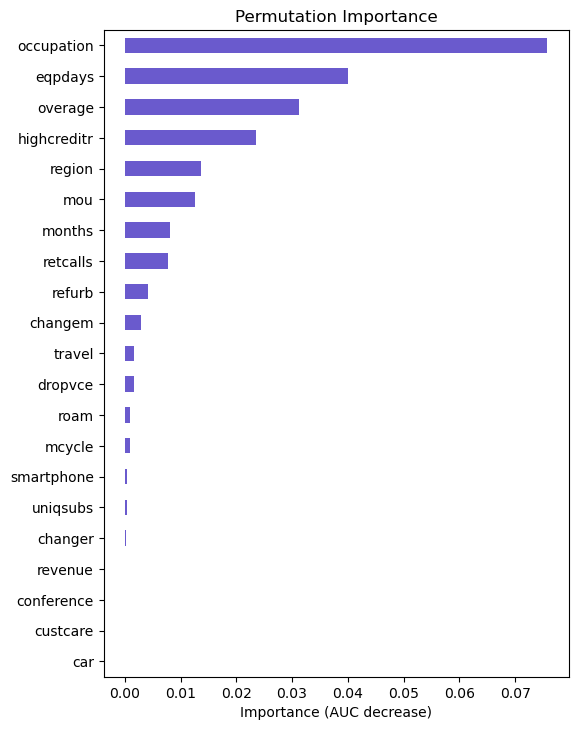

In [117]:
lrw.plot('vimp')

### Use your model to describe the main drivers of churn and report on the key factors that predict customer churn and their relative importance

Based on the permutation importance plots we can see that the following are main (top 5)drivers of churn for S-Mobile
1. Occupation
2. Equipment days
3. Overage
4. High credit Rating
5. Region (Central Singapore)

After plotting the partial prediction plots, we can make unpack some of these drivers and make assumptions regarding what is driving them


Next, I will plot the prediction plots scaled on the representative sample for a more accurate representation of how the prediction changes based on the feature variables

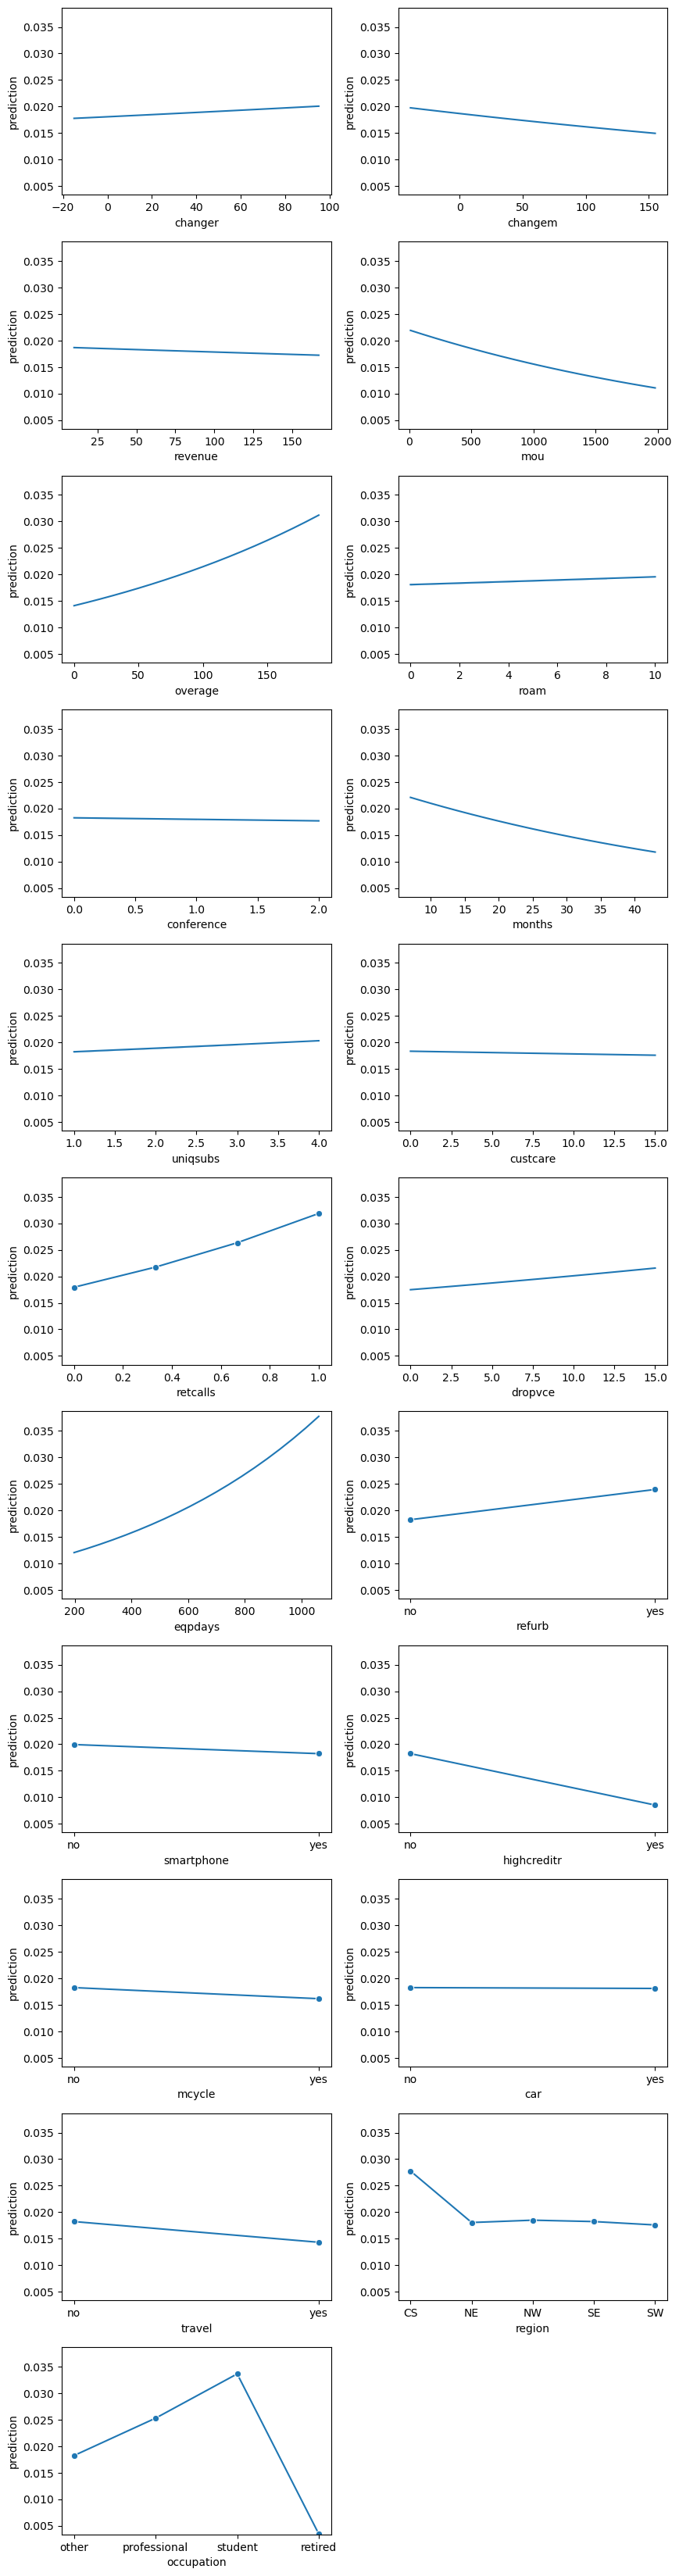

In [118]:
lrw.plot(
    'pred',
    data=s_mobile[s_mobile.representative == 1],
)

To continue the discussion on main drivers of churn, the partial dependance plots have revealed some interesting insights about the top 5 drivers and we can now take a deeper look at them:

1. Occupation:
Students appear to have the highest rate of churn while retirees have the lowest. This can be because students, often operating on a low budget, churn or switch carriers to get the best low cost plan on the market. Any incentives aimed at retaining students would need to consider the CLV of students considering they are low ARPU (revenue generating customers) but once they start working can potentially be loyal customers


2. Equipment days:
Customers switch carriers especially around the 1.5 to 2 year mark to get the latest device/smartphone on a discount or free. Often carriers will offer new customers heavy discounts on new devices to lure them from their current carrier. 
3. Overage:
Customers with overage potentially switch carriers and churn as overage adds unpredictability to their billing and they have to pay a high fee for the top up data or minutes they purchase on top of their plans. Usually a good strategy to retain these customers would be to offer them a bigger bundle or plan with more data and minutes on a discounted price

4. High credit Rating
Based on our understanding of this metric from searching online and on CHAT GPT, this metric represents customers with a high credit rating. Customers with a high credit rating are likely to churn by being poached/attracted by competitors who offer them the best deals and promotions at discounted rates. A strategy to retain them could be to flag highcredit customers and offer them the best deals and promos exclusive to them. 

5. Region (Central Singapore)
We can see that Central Singapore has the highest churn rate compared to all the other regions and this can be due to a few reasons: coverage issues, congestion due to high number of users which impacts quality of service, and also poor customer service compared to other regions.

6. Retcalls
This is one of the drivers we've explored in the incentive section -- customers who call >=1 or at least once to the retention team have a high probability of churning probably because they are trying to leave and are getting frustrated. To retain these customers one could potentially offer them a discount on their plan. 

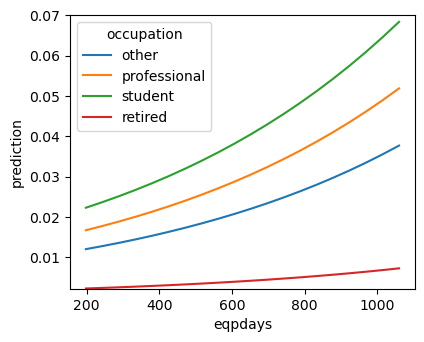

In [119]:
lrw.plot(
    'pred',
    data=s_mobile[s_mobile.representative == 1],
    incl=[],
    incl_int = (['eqpdays:occupation'])
)

We were interested in analyzing any interaction in the variables. However, we haven't found any interaction.

Within occupation, students seem to have the highest contribution churn. 

Within regions, Central Singapore seems to have the highest contribution to churn

Making predictions

In [120]:
s_mobile['churn_pred_lrw'] = lrw.predict(s_mobile)['prediction']

### Neural Networks

I will now proceed to develop a NN model to uncover potential interactions that we can incorporate into the logit to improve its performance

In [121]:
clf1_nn = rsm.mlp({'mobile': s_mobile[s_mobile.training==1]}, 
                  rvar='churn', 
                  lev='yes', 
                  evar=feature_matrix, 
                  hidden_layer_sizes=(2,3)
                  )
clf1_nn.summary()

Multi-layer Perceptron (NN)
Data                 : mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Model type           : classification
Nr. of features      : (21, 26)
Nr. of observations  : 27,300
Hidden_layer_sizes   : (2, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.71

Raw data             :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays refurb smartphone highcreditr mcycle car travel region occupation
       0       -8       35  560        0     0           0      37         1         0       0.0        0    58

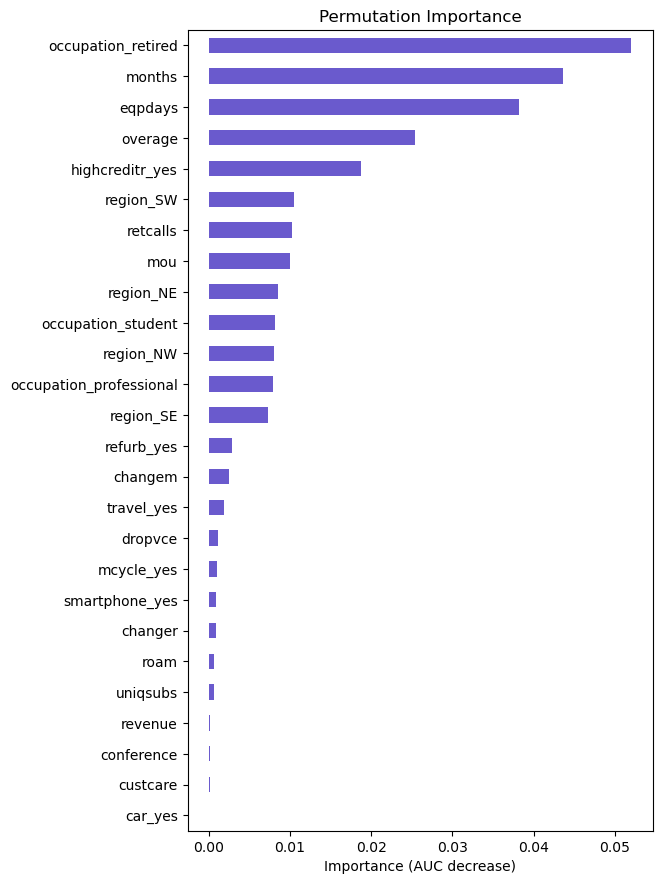

In [122]:
clf1_nn.plot('vimp')

In [123]:
"""from sklearn import metrics
from sklearn.model_selection import GridSearchCV

hls = [(3,1), (3,3), (3,5), (4,4), (5,5)]

learning_rate = ['constant', 'invscaling', 'adaptive']

param_grid = {'hidden_layer_sizes': hls,
              'learning_rate': learning_rate}

scoring = {'AUC': 'roc_auc'}

nn_cv = GridSearchCV(
    clf1_nn.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=1
)"""

"from sklearn import metrics\nfrom sklearn.model_selection import GridSearchCV\n\nhls = [(3,1), (3,3), (3,5), (4,4), (5,5)]\n\nlearning_rate = ['constant', 'invscaling', 'adaptive']\n\nparam_grid = {'hidden_layer_sizes': hls,\n              'learning_rate': learning_rate}\n\nscoring = {'AUC': 'roc_auc'}\n\nnn_cv = GridSearchCV(\n    clf1_nn.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit='AUC', verbose=1\n)"

In [124]:
#nn_cv.fit(clf1_nn.data_onehot,clf1_nn.data.churn)

In [125]:
#pd.DataFrame(nn_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

Saving the best params

In [126]:
import joblib
#clf1_nn_best_params = nn_cv.best_params_
#joblib.dump(clf1_nn_best_params, 'clf1_best_params.pkl')

Loading the best parameters

In [127]:
clf1_nn_best_params = joblib.load('clf1_best_params.pkl')

##### Re-estimating optimized NN

In [128]:
clf1_nn_optimized = rsm.mlp({'mobile': s_mobile[s_mobile.training==1]}, 
                  rvar='churn', 
                  lev='yes', 
                  evar=feature_matrix, 
                  **clf1_nn_best_params
                  )
clf1_nn_optimized.summary()

Multi-layer Perceptron (NN)
Data                 : mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Model type           : classification
Nr. of features      : (21, 26)
Nr. of observations  : 27,300
Hidden_layer_sizes   : (3, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.711
Extra arguments      : learning_rate=constant

Raw data             :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays refurb smartphone highcreditr mcycle car travel region occupation
       0       -8       35  560        0     0           0      

Make predictions

In [129]:
s_mobile['churn_pred_nn'] = clf1_nn_optimized.predict(s_mobile)['prediction']

### Random Forest

In [130]:
rf = rsm.model.rforest(
    data={'s_mobile':s_mobile[s_mobile.training==1]},
    rvar='churn',
    lev="yes",
    evar=feature_matrix,
)

rf.summary()

Random Forest
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 27,300
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.716

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -8       35  560        0     0           0     

Optimize RF

In [131]:
"""from sklearn import metrics
from sklearn.model_selection import GridSearchCV

max_features = ['auto', 'sqrt', 'log2', 0.5, 0.8]

n_estimators = [600, 800, 1000]

param_grid = {'max_features': max_features,
              'n_estimators': n_estimators}

scoring = {'AUC': 'roc_auc'}

rf_cv = GridSearchCV(
    rf.fitted, 
    param_grid, 
    scoring=scoring, 
    cv=5, 
    n_jobs=4, 
    refit='AUC', 
    verbose=1
)"""

"from sklearn import metrics\nfrom sklearn.model_selection import GridSearchCV\n\nmax_features = ['auto', 'sqrt', 'log2', 0.5, 0.8]\n\nn_estimators = [600, 800, 1000]\n\nparam_grid = {'max_features': max_features,\n              'n_estimators': n_estimators}\n\nscoring = {'AUC': 'roc_auc'}\n\nrf_cv = GridSearchCV(\n    rf.fitted, \n    param_grid, \n    scoring=scoring, \n    cv=5, \n    n_jobs=4, \n    refit='AUC', \n    verbose=1\n)"

In [132]:
#rf_cv.fit(rf.data_onehot,rf.data.churn)

In [133]:
#pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

Saving the best parameters

In [134]:
#rf_best_params = rf_cv.best_params_
#joblib.dump(rf_best_params, 'rf_best_params.pkl')

Loading the best parameters

In [135]:
rf_best_params = joblib.load('rf_best_params.pkl')

Re-estimating RF model based on the best parameters

In [136]:
rf_optimized = rsm.model.rforest(
    data={'s_mobile':s_mobile[s_mobile.training==1]},
    rvar='churn',
    lev="yes",
    evar=feature_matrix,
    **rf_best_params
)

rf_optimized.summary()

Random Forest
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 27,300
max_features         : sqrt (5)
n_estimators         : 1000
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.731

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -8       35  560        0     0           0    

Make predictions

In [137]:
s_mobile['churn_pred_rf'] = rf_optimized.predict(s_mobile)['prediction']

Trying to see if we can uncover interactions

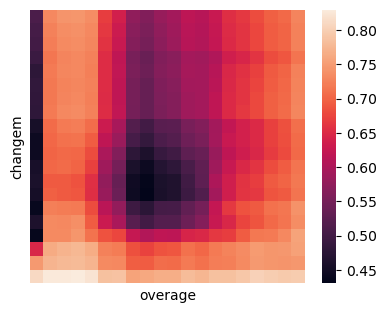

In [138]:
rf_optimized.plot(
    'pred',
    incl=[],
    incl_int = ['overage:changem']
)

### XGBoost

In [139]:
from xgboost import XGBClassifier
import xgboost as xgb

In [140]:
allDF = s_mobile.copy() # copy of the dataframe since I will have to perform one-hot encoding on all the feature variables"""

In [141]:
allDF.dtypes

customer            object
churn             category
changer              int32
changem              int32
revenue              int32
mou                  int32
overage              int32
roam                 int32
conference           int32
months               int32
uniqsubs             int32
custcare             int32
retcalls           float64
dropvce              int32
eqpdays            float64
refurb            category
smartphone        category
highcreditr       category
mcycle            category
car               category
travel            category
region            category
occupation        category
training           float64
representative       int32
cweight              int64
churn_pred_lrw     float64
churn_pred_nn      float64
churn_pred_rf      float64
dtype: object

setting up a pipeline to one-hot encode categorical features and allow the remaining to pass through as is

In [142]:
# one hot encoding for churn
allDF['churn_yes'] = np.where(allDF.churn == 'yes',1,0)

categorical_features = ['region', 'occupation', 'refurb', 'smartphone', 'highcreditr', 'mcycle', 'car', 'travel']
numerical_features = ['changer', 'changem', 'revenue', 'mou', 'overage', 'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls', 'dropvce', 'eqpdays']

numeric_transformer = SimpleImputer(strategy='median')  # fill missing values - I don't think we have null values but just to be safe

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Setting up the training and test data

In [143]:
# train set
XGB_train = allDF[allDF.training == 1]
X_train = XGB_train[feature_matrix] # same feature matrix used for logit, nn, and RF
y_train = XGB_train['churn_yes']

# test set
XGB_test = allDF[allDF.training == 0]
X_test = XGB_test[feature_matrix]
y_test = XGB_test['churn_yes']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27300, 21), (27300,), (11700, 21), (11700,))

Setting up the XGB model

In [144]:
from sklearn.metrics import roc_auc_score

XGB_model = xgb.XGBClassifier(
    gamma=1,
    learning_rate=0.01,
    max_depth = 5,
    min_child_weight=8,
    n_estimators=500,
    objective='binary:logistic', 
    use_label_encoder=False,  
    eval_metric="logloss"  
)

# passing the data pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGB_model)])

# estimating the model
pipeline.fit(X_train, y_train)

# Predicting probabilities for churn by setting the index to 1. To predict probabilities for no churn I can use 0
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

print(f'XGB Model AUC: {auc:,.4f}') 

XGB Model AUC: 0.7466


Best AUC so far but we can improve this via grid search

##### Optimisation via grid search

In [145]:
"""n_estimators = [500,700,900]
learning_rate = [0.01, 0.001, 0.1]
max_depth = [3,4,5]
min_child_weight = [4,6,8]

param_grid = {
    'classifier__n_estimators': n_estimators,
    'classifier__learning_rate': learning_rate,
    'classifier__max_depth': max_depth,
    'classifier__min_child_weight': min_child_weight
}

# Create the GridSearchCV object
XGB_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1) # n_jobs -1 utilises all available CPU cores"""

"n_estimators = [500,700,900]\nlearning_rate = [0.01, 0.001, 0.1]\nmax_depth = [3,4,5]\nmin_child_weight = [4,6,8]\n\nparam_grid = {\n    'classifier__n_estimators': n_estimators,\n    'classifier__learning_rate': learning_rate,\n    'classifier__max_depth': max_depth,\n    'classifier__min_child_weight': min_child_weight\n}\n\n# Create the GridSearchCV object\nXGB_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1) # n_jobs -1 utilises all available CPU cores"

In [146]:
#XGB_cv.fit(X_train, y_train)

In [147]:
#pd.DataFrame(XGB_cv.cv_results_).iloc[:, 5:].sort_values('rank_test_score')

In [148]:
#XGB_best_params = XGB_cv.best_params_
#joblib.dump(XGB_best_params, 'xgb_best_params.pkl')

In [149]:
XGB_best_params = joblib.load('xgb_best_params.pkl')
XGB_best_params

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 4,
 'classifier__n_estimators': 500}

Re-estimating the optimized XGB

In [150]:
optimized_classifier = xgb.XGBClassifier(**{k.replace('classifier__', ''): v for k, v in XGB_best_params.items()})

# Create a new pipeline with the optimized classifier
optimized_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', optimized_classifier)])

# Fit the optimized pipeline
optimized_pipeline.fit(X_train, y_train)

y_pred_proba = optimized_pipeline.predict_proba(X_test)[:, 1]
auc_optimized = roc_auc_score(y_test, y_pred_proba)
print(f'Optimized XGB Model AUC: {auc_optimized:.4f}')

Optimized XGB Model AUC: 0.7645


In [151]:
s_mobile['churn_pred_xgb'] = np.nan

s_mobile.loc[X_test.index, 'churn_pred_xgb'] = y_pred_proba

In [152]:
s_mobile[s_mobile.training==0]['churn_pred_xgb'].mean()

0.49832519459912283

XGB is our best model so far based on AUC. However, we will chose Logit for our analysis for the following reasons:
1. It is Analyst Driven Model and offers the best visibility in terms of parameters and features used
2. We have a weight component that we need to incorporate to simulate the churn rate of the representative sample in our training sample and that is most intuitive to do so in the Logit model compared to NN, RF and XGB. 

### Actions/offers/incentives

In this section we will try to combat the main drivers of churn discussed above by countering their effects via offers. In the next section "CLV" we will see if these incentives are feasible or not. We will use logistic regression since we want to manipulate the assignment of various features (i.e. set them to 0 or 1) and since we have incorporated the weight component into our logit, it is the most appropriate choice.

#### Incentive 1: Offer a discount to purchase a new device to combat churn driven by people jumping carriers to get a new device for free. This will entail setting eqpdays to 0 and seeing the simulated effect on churn

We will only use the representative sample for these offers and incentives calcs

In [153]:
s_mobile_rep = s_mobile[s_mobile.representative == 1].copy()

In [154]:
s_mobile_rep['churn_yes'] = np.where(s_mobile_rep.churn == 'yes',1,0)

Average churn rate

In [155]:
avg_churn = np.mean(s_mobile_rep['churn_yes'])
avg_churn

0.02

In [156]:
s_mobile_rep['p_free_device_upgrade'] = lrw.predict(s_mobile_rep.assign(eqpdays=0))['prediction']
s_mobile_rep.query("churn_pred_lrw > 0.02 & eqpdays > 700")[['churn_yes','p_free_device_upgrade']].agg(['count','mean']).round(4)

,churn_yes,p_free_device_upgrade
count,3735.0000,3735.0000
mean,0.0337,0.0111


Initial thoughts: This is a substantial decrease in churn so we can potentially conclude that getting a new phone are a strong driver of retention. To decide if this is a viable strategy, we would like to get a view of the economic and financial impact (cost of device vs CLV of retained customers) to s_mobile of offering free device upgrades. This economic analysis can be seen in the next chapter.

#### Incentive 2: Proactive strategy: Offer your best deal to at risk customers so they don't call the retention team

In [157]:
s_mobile_rep['retcalls'].value_counts()

retcalls
0.0    29246
1.0      693
2.0       56
3.0        5
Name: count, dtype: int64

In [158]:
s_mobile_rep['p_best_deal_retcalls'] = lrw.predict(s_mobile_rep.assign(retcalls=0))['prediction']
s_mobile_rep.query("churn_pred_lrw > 0.02 & retcalls >= 1")[['churn_yes','p_best_deal_retcalls']].agg(['count','mean']).round(4)

,churn_yes,p_best_deal_retcalls
count,520.0000,520.0000
mean,0.0462,0.0237


As we can see, the churn rate would decrease significantly. It is important to mention that we have selected only the customers with a churn rate that is higher than the average. The churn rate would be decreased by half if we can find a way for them to not call the retention team. 

In our implementation, we are targeting customers who call atleast once (retcalls >=1) in order to hear their complaints and respond appropriately. We are assuming that listening to customers who call the retention centre and hearing about their complaints is more effective than targeting those who do not call but are somehow churn-inclined since we are targeting churn-inclined customers in many different ways via other incentives.

#### Incentive 3: Prevent overage by upgrading to bigger bundle -- upgrade customers with frequent overage to a more premium package with larger limits. This will potentially lower churn driven by customers with frequent overage needing to cover the high cost of exceeding the package limits

In [159]:
s_mobile_rep['p_prevent_overage'] = lrw.predict(s_mobile_rep.assign(overage=0))['prediction']
s_mobile_rep.query("churn_pred_lrw > 0.02 & overage > 0")[['churn_yes','p_prevent_overage']].agg(['count','mean']).round(4)

,churn_yes,p_prevent_overage
count,8105.000,8105.0000
mean,0.036,0.0208


In case the customer has a proper plan that allows me to not have overage usage, the decrease in probability of churn would allow those clients to be closer to the average rate. We are assuming that upgrading to a larger bundle on a discount will prevent overage and the high premium these customers have to pay for topping up their data or minutes and churning due to the high cost. 

#### Incentive 4: Prevent high credit customers from churning by offering them discounts on their packages/bundles

In [160]:
s_mobile_rep['p_prevent_highcredit'] = lrw.predict(s_mobile_rep.assign(highcredit=0))['prediction']
s_mobile_rep.query("churn_pred_lrw > 0.02")[['churn_yes','p_prevent_highcredit']].agg(['count','mean']).round(4)

,churn_yes,p_prevent_highcredit
count,12613.0000,12613.0000
mean,0.0326,0.0319


We are assuming that high credit rating customers are ones who pay their bills on time and do not have outstandings with us. These are the type of customers who are attracted by competitors who offer them the best deals and bundles. By assinging highcredit == 0 we are simulating the impact of retaining these churn-inclined customers with the logic being if they have a pseudo 'low credit' then they will stay with us. Of course in actuality, we are assuming that they would choose to stay with S Mobile. To retain them we can offer them exclusive premium bundles if the economics make sense.

#### Incentive 5: Deal with the high churn of the CS (central singapore) region by potentially replicating the sales model, customer service and quality control standards of the South West region

In [161]:
s_mobile_rep['p_prevent_highcredit'] = lrw.predict(s_mobile_rep.assign(region='SW'))['prediction']
s_mobile_rep.query("churn_pred_lrw > 0.02 & region == 'SW'")[['churn_yes','p_prevent_highcredit']].agg(['count','mean']).round(4)

,churn_yes,p_prevent_highcredit
count,2077.0000,2077.0000
mean,0.0332,0.0296


The decrease in churn rate would not be as efficient as the previous incentives. Also, it might be hard to know why those customers are more likely to churn. We should analyze the difference in infrastructure quality between the regions to understand the drivers of churn based on the location. 

### CLV for incentive 1 (Customer with old devices)

Please note we are displaying two key pieces of info - the reduction in churn rate and the count of people whom we are targeting for this incentive

CLV before incentive (status-quo)

In [162]:
s_mobile_rep.query("churn_pred_lrw > 0.02 & eqpdays > 700")[['churn_yes','p_free_device_upgrade', 'revenue']].agg(['count','mean']).round(4)

,churn_yes,p_free_device_upgrade,revenue
count,3735.0000,3735.0000,3735.0000
mean,0.0337,0.0111,45.0726


In [163]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.0337
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 45.0726
print(monthly_revenue)


# costs of revenue
cost_service = 0
marketing_cost = 0

# Number of Years
nr_years = 5

45.0726


In [164]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV1 = np.cumsum(PV_exp_profit)
CLV1.round(2)



array([  45.07,   88.28,  129.7 ,  169.41,  207.48,  243.98,  278.96,
        312.5 ,  344.65,  375.48,  405.03,  433.35,  462.68,  490.8 ,
        517.75,  543.59,  568.36,  592.11,  614.87,  636.69,  657.62,
        677.67,  696.9 ,  715.33,  734.42,  752.71,  770.25,  787.06,
        803.18,  818.63,  833.44,  847.64,  861.26,  874.31,  886.82,
        898.81,  911.23,  923.13,  934.55,  945.49,  955.97,  966.03,
        975.67,  984.91,  993.77, 1002.26, 1010.4 , 1018.2 , 1026.28,
       1034.03, 1041.45, 1048.57, 1055.4 , 1061.94, 1068.21, 1074.22,
       1079.99, 1085.51, 1090.81, 1095.89])

CLV with incentive 

In [165]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.0111
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 45.0726
print(monthly_revenue)


# Cost at the beginning of the period due to the phone discount (Let's say 300 dollars)
Switching_cost = 300

# Number of Years
nr_years = 5

45.0726


In [166]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV2 = np.cumsum(PV_exp_profit) - Switching_cost
CLV2.round(2)

S_mobile_df = pd.DataFrame(
    {"Months": np.arange(1, 61), "Status quo": CLV1, "Treatment": CLV2}
)
S_mobile_df

,Months,Status quo,Treatment
0,1,45.072600,-254.927400
1,2,88.281698,-210.707720
2,3,129.704339,-167.324819
3,4,169.414384,-124.762864
4,5,207.482639,-83.006319
5,6,243.976983,-42.039944
6,7,278.962488,-1.848785
7,8,312.501536,37.581827
8,9,344.653930,76.266284
9,10,375.477002,114.218705


In [167]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
from scipy.optimize import root

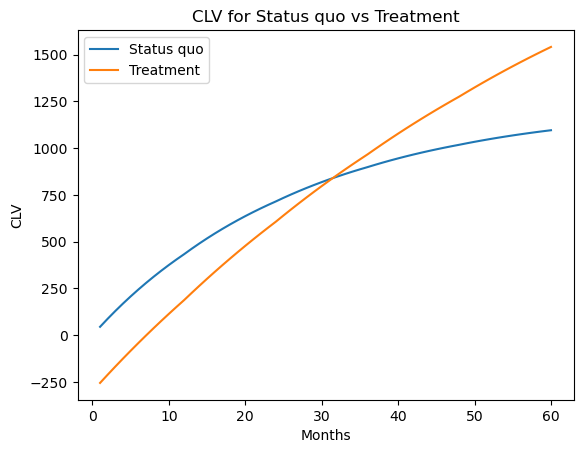

In [168]:
plot_df = pd.melt(
    S_mobile_df,
    id_vars="Months",
    value_vars=["Status quo", "Treatment"],
    var_name="Assumption",
    value_name="CLV",
)
# increase plot resolution for slide
# mpl.rcParams['figure.dpi'] = 300
fig = sns.lineplot(x="Months", y="CLV", data=plot_df, hue="Assumption")
fig.set(title="CLV for Status quo vs Treatment")
fig.legend().set_title(None)
# to copy the plot, right click and select "Create new view for output"
# then right click on the plot in the "new view" and paste where you need it

Offering a discount for a new phone would improved the CLV from 1,095.88 to 1,541.26 SGD (40%). Also, we can see that the CLV overcome the status-quo after 32 months. This incentive allows to increase the CLV in a significant way.

### Incentive 2: Upgrade the customers with overage 

In [169]:
s_mobile_rep.query("churn_pred_lrw > 0.02 & overage > 0")[['churn_yes','p_prevent_overage', 'revenue']].agg(['count','mean']).round(4)

,churn_yes,p_prevent_overage,revenue
count,8105.000,8105.0000,8105.0000
mean,0.036,0.0208,67.1346


CLV status-quo

In [170]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.036
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 67.1346
print(monthly_revenue)


# costs of revenue
cost_service = 0
marketing_cost = 0

# Number of Years
nr_years = 5

67.1346


In [171]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV1 = np.cumsum(PV_exp_profit)
CLV1.round(2)


array([  67.13,  131.34,  192.75,  251.47,  307.63,  361.35,  412.72,
        461.85,  508.83,  553.77,  596.75,  637.85,  680.3 ,  720.9 ,
        759.73,  796.86,  832.38,  866.34,  898.83,  929.89,  959.61,
        988.02, 1015.2 , 1041.19, 1068.03, 1093.7 , 1118.26, 1141.74,
       1164.2 , 1185.68, 1206.22, 1225.86, 1244.65, 1262.62, 1279.8 ,
       1296.24, 1313.21, 1329.45, 1344.97, 1359.82, 1374.02, 1387.61,
       1400.59, 1413.02, 1424.9 , 1436.26, 1447.13, 1457.52, 1468.25,
       1478.52, 1488.34, 1497.73, 1506.71, 1515.29, 1523.51, 1531.36,
       1538.88, 1546.06, 1552.93, 1559.5 ])

CLV with incentive

In [172]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.0208
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 67.1346
print(monthly_revenue)

#Marketing upgrade (Let's say that the value of the upgrade is 15 per month)
marketing_cost = 15


# Number of Years
nr_years = 5

67.1346


In [173]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV2 = np.cumsum(PV_exp_profit)
CLV2.round(2)

array([  52.13,  102.78,  151.98,  199.78,  246.21,  291.32,  335.13,
        377.7 ,  419.05,  459.23,  498.25,  536.16,  576.79,  616.25,
        654.59,  691.83,  728.01,  763.15,  797.3 ,  830.47,  862.69,
        893.99,  924.4 ,  953.94,  985.53, 1016.22, 1046.03, 1075.  ,
       1103.13, 1130.46, 1157.02, 1182.81, 1207.87, 1232.21, 1255.86,
       1278.83, 1303.36, 1327.18, 1350.33, 1372.81, 1394.66, 1415.88,
       1436.49, 1456.51, 1475.97, 1494.86, 1513.22, 1531.06, 1550.07,
       1568.53, 1586.48, 1603.9 , 1620.83, 1637.28, 1653.26, 1668.78,
       1683.86, 1698.51, 1712.74, 1726.56])

In [174]:
S_mobile_2 = pd.DataFrame(
    {"Months": np.arange(1, 61), "Status quo": CLV1, "Treatment": CLV2}
)
S_mobile_2

,Months,Status quo,Treatment
0,1,67.134600,52.134600
1,2,131.340369,102.780939
2,3,192.745080,151.981503
3,4,251.470933,199.777562
4,5,307.634797,246.209210
5,6,361.348442,291.315397
6,7,412.718761,335.133960
7,8,461.847986,377.701657
8,9,508.833886,419.054194
9,10,553.769968,459.226260


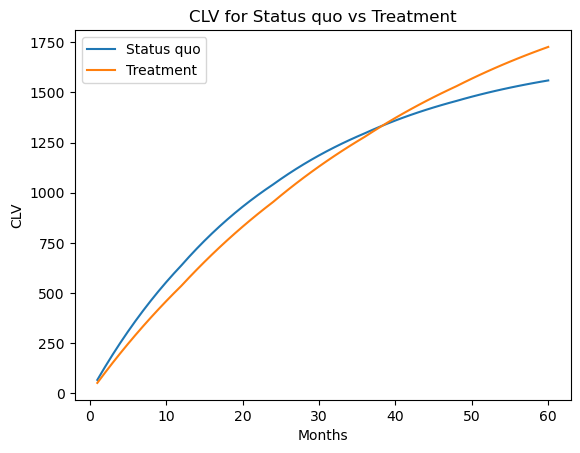

In [175]:
plot_df = pd.melt(
    S_mobile_2,
    id_vars="Months",
    value_vars=["Status quo", "Treatment"],
    var_name="Assumption",
    value_name="CLV",
)
# increase plot resolution for slide
# mpl.rcParams['figure.dpi'] = 300
fig = sns.lineplot(x="Months", y="CLV", data=plot_df, hue="Assumption")
fig.set(title="CLV for Status quo vs Treatment")
fig.legend().set_title(None)
# to copy the plot, right click and select "Create new view for output"
# then right click on the plot in the "new view" and paste where you need it

Offer a higher plan at the the same price as the current plan increases the CLV from 1,559.50 to 1,726.56 SGD (10%). This is a smaller improvement than our first incentive. Also, it would take 39 months to overcome the status-quo.


### CLV for customers who calls retention team

In [176]:
s_mobile_rep.query("churn_pred_lrw > 0.02 & retcalls >= 1")[['churn_yes','p_best_deal_retcalls', 'revenue']].agg(['count','mean']).round(4)

,churn_yes,p_best_deal_retcalls,revenue
count,520.0000,520.0000,520.000
mean,0.0462,0.0237,60.025


In [177]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.0462
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 60.025
print(monthly_revenue)


# costs of revenue
cost_service = 0
marketing_cost = 0

# Number of Years
nr_years = 5

60.025


In [178]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV1 = np.cumsum(PV_exp_profit)
CLV1.round(2)

array([  60.02,  116.82,  170.57,  221.43,  269.55,  315.09,  358.18,
        398.95,  437.54,  474.05,  508.59,  541.28,  574.69,  606.3 ,
        636.22,  664.52,  691.31,  716.65,  740.64,  763.33,  784.8 ,
        805.12,  824.35,  842.55,  861.14,  878.73,  895.38,  911.14,
        926.04,  940.15,  953.5 ,  966.13,  978.08,  989.39, 1000.09,
       1010.22, 1020.57, 1030.36, 1039.63, 1048.39, 1056.69, 1064.54,
       1071.97, 1079.  , 1085.65, 1091.95, 1097.9 , 1103.54, 1109.3 ,
       1114.75, 1119.91, 1124.79, 1129.41, 1133.78, 1137.91, 1141.82,
       1145.53, 1149.03, 1152.34, 1155.48])

In [179]:
# changes rates on Revenue
annual_discount_rate = 0.1
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1


monthly_churn = 0.0208
annual_churn = 1 - (1 - monthly_churn) ** 12
annual_growth = 0.08


# Number of Years
nr_years = 5

# Revenue status quo
monthly_revenue = 60.025
print(monthly_revenue)

#Marketing upgrade (Let's say that we offer them a 10 dollars discount per month)
marketing_cost = 10


# Number of Years
nr_years = 5

60.025


In [180]:
nr_months = 12 * nr_years
time = np.array(range(0, nr_months)) + 1
growth = np.power(1 + annual_growth, range(0, nr_years))
growth = np.repeat(growth, 12, axis=0)
revenues = np.array([monthly_revenue] * nr_months)
revenues = np.reshape(revenues, nr_months, order="F") * growth
service = np.array([cost_service] * nr_months)
marketing = np.array([marketing_cost] * nr_months)
profit = revenues - service - marketing
active = np.power(1 - monthly_churn, time - 1)
active_avg = (active + rsm.lag(active, fill=1)) / 2
exp_profit = active * profit
PV_exp_profit = exp_profit / np.power(1 + monthly_discount_rate, time - 1)
CLV2 = np.cumsum(PV_exp_profit)
CLV2.round(2)

array([  50.02,   98.62,  145.83,  191.69,  236.25,  279.53,  321.57,
        362.42,  402.1 ,  440.64,  478.09,  514.47,  553.2 ,  590.82,
        627.37,  662.88,  697.38,  730.89,  763.44,  795.06,  825.78,
        855.63,  884.62,  912.78,  942.73,  971.83, 1000.09, 1027.55,
       1054.22, 1080.13, 1105.3 , 1129.75, 1153.51, 1176.59, 1199.  ,
       1220.78, 1243.91, 1266.38, 1288.21, 1309.42, 1330.02, 1350.03,
       1369.47, 1388.36, 1406.7 , 1424.53, 1441.84, 1458.66, 1476.51,
       1493.85, 1510.69, 1527.05, 1542.94, 1558.38, 1573.38, 1587.96,
       1602.11, 1615.86, 1629.22, 1642.2 ])

In [181]:
S_mobile_3 = pd.DataFrame(
    {"Months": np.arange(1, 61), "Status quo": CLV1, "Treatment": CLV2}
)
S_mobile_3

,Months,Status quo,Treatment
0,1,60.025000,50.025000
1,2,116.823922,98.621961
2,3,170.570155,145.831649
3,4,221.427765,191.693664
4,5,269.552005,236.246480
5,6,315.089780,279.527468
6,7,358.180101,321.572936
7,8,398.954509,362.418152
8,9,437.537473,402.097380
9,10,474.046774,440.643904


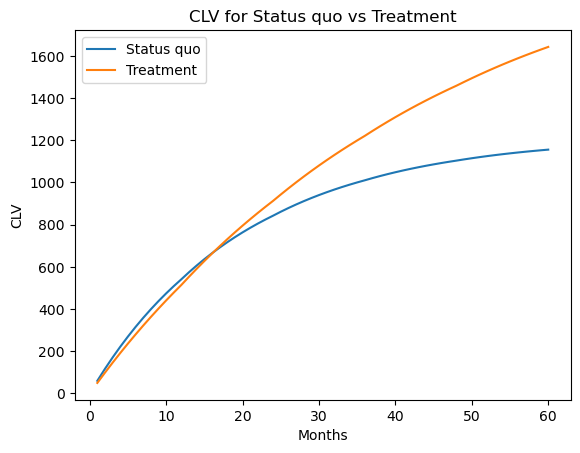

In [182]:
plot_df = pd.melt(
    S_mobile_3,
    id_vars="Months",
    value_vars=["Status quo", "Treatment"],
    var_name="Assumption",
    value_name="CLV",
)
# increase plot resolution for slide
# mpl.rcParams['figure.dpi'] = 300
fig = sns.lineplot(x="Months", y="CLV", data=plot_df, hue="Assumption")
fig.set(title="CLV for Status quo vs Treatment")
fig.legend().set_title(None)
# to copy the plot, right click and select "Create new view for output"
# then right click on the plot in the "new view" and paste where you need it

Offering a discount to clients that calls the retention team (Hence, more likely to churn) increases the CLV from 1,155.48 to 1,642.20 SGD (42%), which is quite interesting. Also, it takes much less time to overcome the status-quo, meaning that the economical impact is balanced faster than the other incentives. 

## Generative AI (5 points): Describe in detail how your team used Generative AI-tools like 

Link 1:  https://chat.openai.com/share/c593a594-9cf3-4e78-b36f-0cfd42151b93

Link 2: https://chat.openai.com/share/e96e127a-5544-4efb-9c01-91ef17da4c3a

Link 3: https://chat.openai.com/share/971818fe-b821-4c10-876e-9679868db8bf

Link 4: https://chat.openai.com/share/731fee43-9342-4fcb-9670-2191c7b209ab


In our collaborative journey to explore various facets of Business Analytics, we employed ChatGPT as a pivotal tool to enhance our understanding and application of key concepts such as churn management, Customer Lifetime Value (CLV) calculation, and integrating switch costs into customer analytics. This document reflects on how we, as a team, engaged with ChatGPT to support our case work, highlighting the effectiveness of our strategies, the challenges we encountered, and the thought process behind maximizing the benefits from ChatGPT's capabilities.

Strategy and Engagement with ChatGPT

Our strategy for leveraging ChatGPT involved a structured approach to inquiry and application. We initiated our discussion by clearly defining our objectives for each case, whether it was to gain a deeper understanding of churn management strategies, calculate CLV, or comprehend the implications of switch costs in customer analytics. By presenting specific questions and requesting detailed explanations or code examples, we ensured that our interactions with ChatGPT were focused and productive.

Key Areas of Utilization

- Summarization and Concept Clarification: We effectively used ChatGPT to summarize complex video content and articles, extract key insights, and clarify advanced concepts, thus streamlining our learning process.
- Code Generation and Explanation: ChatGPT was instrumental in providing code snippets tailored to our data analysis needs, along with comprehensive explanations of the code logic and its application to our datasets.
- Strategic Application and Problem-Solving: We engaged with ChatGPT to apply theoretical concepts to practical scenarios, enhancing our problem-solving skills and understanding of analytical tools.

What Went Well

- Efficient Knowledge Acquisition: Our strategy to use ChatGPT for summarizing content and clarifying concepts allowed us to quickly grasp complex information, enhancing our efficiency.
- Customized Support: The ability of ChatGPT to generate and explain code tailored to our specific needs significantly boosted our practical understanding and application of business analytics concepts.
- Interactive Learning Experience: Our back-and-forth dialogue with ChatGPT fostered an interactive learning environment, enabling us to explore topics in depth and solidify our understanding.

Challenges Encountered

- Depth of Statistical Exploration: While ChatGPT provided a solid foundation, we recognized the need for a deeper exploration of statistical assumptions and their impacts on our analysis, which is essential for a comprehensive understanding of business analytics.
- Real-Time Debugging Limitations: Our interaction format with ChatGPT posed challenges in conducting real-time debugging or iterative refinements based on dynamic analysis results, highlighting a limitation in applying theoretical advice to live datasets.

Thought Process and Maximizing Benefits

Our engagement with ChatGPT was guided by a proactive thought process, aiming to bridge theoretical knowledge with practical application. We approached each query with a clear goal and provided detailed contexts to elicit the most relevant and actionable advice from ChatGPT. By dissecting complex problems into manageable components, we were able to leverage ChatGPT's support effectively, translating conceptual insights into practical analytical strategies.

Reflective Questions and Future Discussions

Our collaboration raises several questions for future exploration:
- How can we further optimize the use of AI tools like ChatGPT for complex analytical tasks, especially in terms of integrating real-time data analysis and debugging?
- What strategies could enhance the depth of understanding statistical assumptions and evaluating model performance using AI-based support?
- How can we ensure that the educational benefits derived from AI tools like ChatGPT are maximized, particularly in reinforcing the linkage between theory and practice in business analytics?

In conclusion, our use of ChatGPT in supporting our case work on business analytics topics demonstrates a successful integration of AI tools in enhancing learning and analytical problem-solving. While we encountered challenges, particularly in the depth of statistical exploration and real-time debugging, our strategic approach and interactive engagement with ChatGPT facilitated a productive and enlightening experience. We look forward to discussing these insights and questions further in class, exploring ways to leverage AI tools more effectively in our future projects. 